# Introduction au Jeu de Données


Ce jeu de données contient des informations sur les professionnels travaillant dans divers domaines liés aux données, y compris leurs détails personnels, leurs informations professionnelles et leurs métriques de performance. Voici les principales colonnes du jeu de données :


FIRST NAME (Prénom) : Prénom de l'employé

LAST NAME (Nom de famille) : Nom de famille de l'employé

SEX (Sexe) : Sexe de l'employé

DOJ (Date d'embauche) : La date à laquelle l'employé a rejoint l'organisation

CURRENT DATE (Date actuelle) : La date actuelle du relevé

DESIGNATION (Intitulé du poste) : Le titre du poste de l'employé (par exemple, Analyste, Associé)

AGE (Âge) : Âge de l'employé

SALARY (Salaire) : Salaire annuel de l'employé

UNIT (Unité) : Le département auquel appartient l'employé

LEAVES USED (Congés utilisés) : Nombre de congés pris par l'employé

LEAVES REMAINING (Congés restants) : Nombre de congés restants pour l'employé

RATINGS (Évaluations) : Évaluation de performance de l'employé

PAST EXP (Expérience passée) : Expérience professionnelle antérieure en années avant de rejoindre l'organisation actuelle

Problématiques Potentielles et Questions
En tant qu'analyste de données, vous pouvez explorer divers aspects de ce jeu de données pour obtenir des informations et répondre à des questions importantes pour l'entreprise. Voici quelques problématiques que vous pourriez aborder :



Analyse des Salaires :

Quel est le salaire moyen pour différents intitulés de postes ?
Existe-t-il une différence significative de salaire entre les différents départements ?
Comment l'expérience corrèle-t-elle avec le salaire ?

Analyse du Genre :

Y a-t-il un écart salarial entre les genres dans l'organisation ?

Quelle est la distribution des employés masculins et féminins dans les différents départements et rôles ?


Analyse Prédictive :

Prédire le salaire d'un employé en fonction de son expérience, de son intitulé de poste, de son département, de ses évaluations de performance, et d'autres variables pertinentes.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Chargement du dataset
file_path = 'Salary Prediction of Data Professions.csv'
data = pd.read_csv(file_path)

In [3]:
# Affichage des premières lignes du jeu de données
print("Aperçu du jeu de données :")
data.head()



Aperçu du jeu de données :


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
# Affichage des colonnes du jeu de données
print("\nColonnes du jeu de données :")
data.columns



Colonnes du jeu de données :


Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [5]:
# Affichage de la taille du jeu de données
print("\nTaille du jeu de données :")
data.shape




Taille du jeu de données :


(2639, 13)

In [6]:
# Types des colonnes
print("\nTypes des colonnes :")
data.dtypes




Types des colonnes :


FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [7]:
# Nombre de valeurs manquantes par colonne
print("\nNombre de valeurs manquantes par colonne :")
data.isnull().sum()




Nombre de valeurs manquantes par colonne :


FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

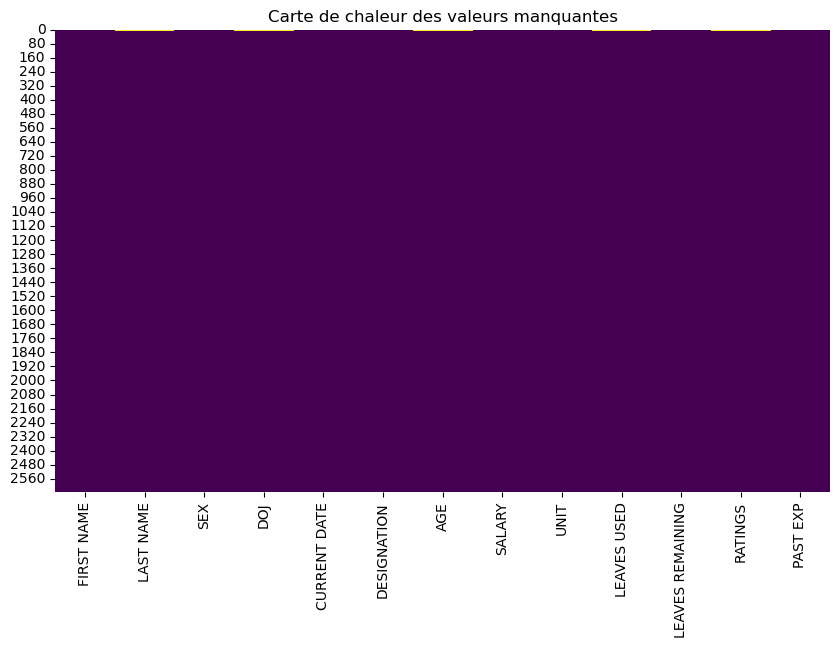

In [8]:
# Visualisation du nombre de valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de chaleur des valeurs manquantes')
plt.show()



In [9]:
# Description statistique du jeu de données
print("\nDescription statistique :")
data.describe(include='all')


Description statistique :


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2639,2637,2639,2638,2639,2639,2636.000000,2639.000000,2639,2636.000000,2637.000000,2637.000000,2639.000000
unique,2367,2475,2,967,1,6,NaN,NaN,6,NaN,NaN,NaN,NaN
top,ELISHA,AHHEE,F,10-19-2013,01-07-2016,Analyst,NaN,NaN,IT,NaN,NaN,NaN,NaN
freq,3,2,1344,12,2639,1949,NaN,NaN,461,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,24.756449,58136.678287,NaN,22.501517,7.503223,3.486159,1.566881
std,NaN,NaN,NaN,NaN,NaN,NaN,3.908228,36876.956944,NaN,4.604469,4.603193,1.114933,2.728416
min,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,40001.000000,NaN,15.000000,0.000000,2.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,43418.000000,NaN,19.000000,4.000000,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,46781.000000,NaN,22.000000,8.000000,3.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,51401.500000,NaN,26.000000,11.000000,4.000000,2.000000


Effacer les valeurs manquantes car il y en a pas beaucoup

In [10]:
df=data.dropna()

In [11]:
df.shape

(2631, 13)

8 lignes ont été effacé

In [12]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

# Analyses du salaire

In [13]:
# Sélection des colonnes à analyser
columns_to_analyze = ['AGE', 'SEX', 'DOJ', 'DESIGNATION', 'UNIT', 'RATINGS', 'PAST EXP', 'SALARY']

# Filtrer le jeu de données pour ne conserver que les colonnes d'intérêt
data_filtered = data[columns_to_analyze]

# Encoder les colonnes catégorielles et stocker les classes
label_encoders = {}
for column in ['SEX', 'DESIGNATION', 'UNIT']:
    le = LabelEncoder()
    data_filtered[column] = le.fit_transform(data_filtered[column])
    label_encoders[column] = le.classes_

# Afficher les classes pour chaque colonne encodée
for column, classes in label_encoders.items():
    print(f"Encodage pour la colonne {column}:")
    for idx, class_ in enumerate(classes):
        print(f"  {class_} -> {idx}")

# Convertir les dates en format numérique (année)
data_filtered['DOJ'] = pd.to_datetime(data_filtered['DOJ'], errors='coerce').dt.year





Encodage pour la colonne SEX:
  F -> 0
  M -> 1
Encodage pour la colonne DESIGNATION:
  Analyst -> 0
  Associate -> 1
  Director -> 2
  Manager -> 3
  Senior Analyst -> 4
  Senior Manager -> 5
Encodage pour la colonne UNIT:
  Finance -> 0
  IT -> 1
  Management -> 2
  Marketing -> 3
  Operations -> 4
  Web -> 5


In [14]:
# Calcul de la matrice de corrélation
correlation_matrix = data_filtered.corr()

# Affichage de la matrice de corrélation
print("\nMatrice de corrélation :")
print(correlation_matrix)


Matrice de corrélation :
                  AGE       SEX       DOJ  DESIGNATION      UNIT   RATINGS  \
AGE          1.000000 -0.014777 -0.474306     0.627541 -0.027707  0.036801   
SEX         -0.014777  1.000000  0.008698     0.002635 -0.004591 -0.038849   
DOJ         -0.474306  0.008698  1.000000    -0.360860  0.006784 -0.011765   
DESIGNATION  0.627541  0.002635 -0.360860     1.000000 -0.029729  0.013279   
UNIT        -0.027707 -0.004591  0.006784    -0.029729  1.000000  0.002544   
RATINGS      0.036801 -0.038849 -0.011765     0.013279  0.002544  1.000000   
PAST EXP     0.903926 -0.021982 -0.253847     0.458542 -0.034673  0.040123   
SALARY       0.872213 -0.027798 -0.450591     0.498504 -0.023012  0.020248   

             PAST EXP    SALARY  
AGE          0.903926  0.872213  
SEX         -0.021982 -0.027798  
DOJ         -0.253847 -0.450591  
DESIGNATION  0.458542  0.498504  
UNIT        -0.034673 -0.023012  
RATINGS      0.040123  0.020248  
PAST EXP     1.000000  0.854046  

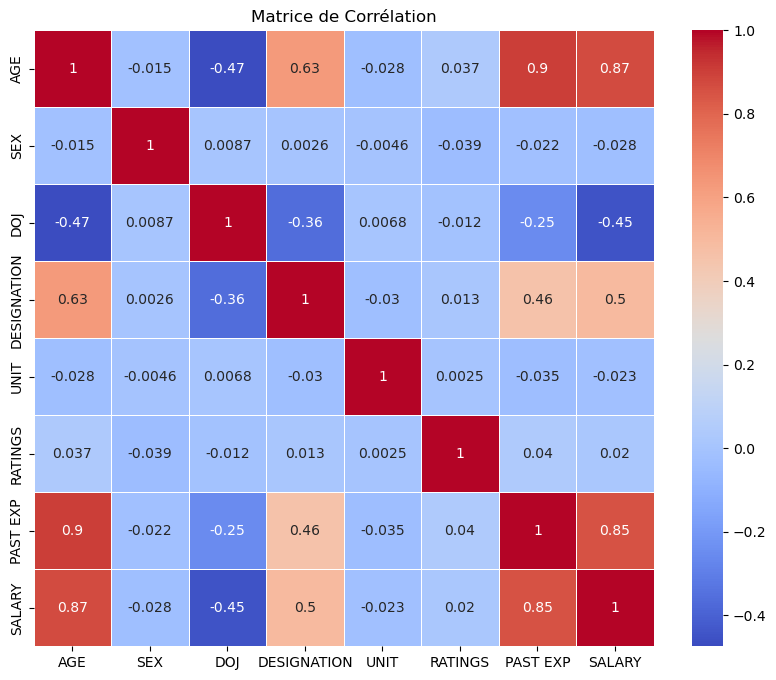

In [15]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()


Interprétation
Les résultats montrent que l'âge et l'expérience passée sont les deux facteurs les plus fortement corrélés avec le salaire. Les employés plus âgés et ceux ayant plus d'expérience tendent à gagner des salaires plus élevés. L'intitulé du poste a également une influence notable sur le salaire, bien que moindre par rapport à l'âge et l'expérience.

En revanche, le sexe, le département et les évaluations de performance semblent avoir peu d'impact sur le salaire, du moins selon les corrélations observées dans ce dataset. La date d'embauche montre une corrélation négative avec le salaire, suggérant que les employés plus récemment embauchés ont tendance à gagner moins, ce qui peut refléter une accumulation d'expérience et de promotions avec le temps.

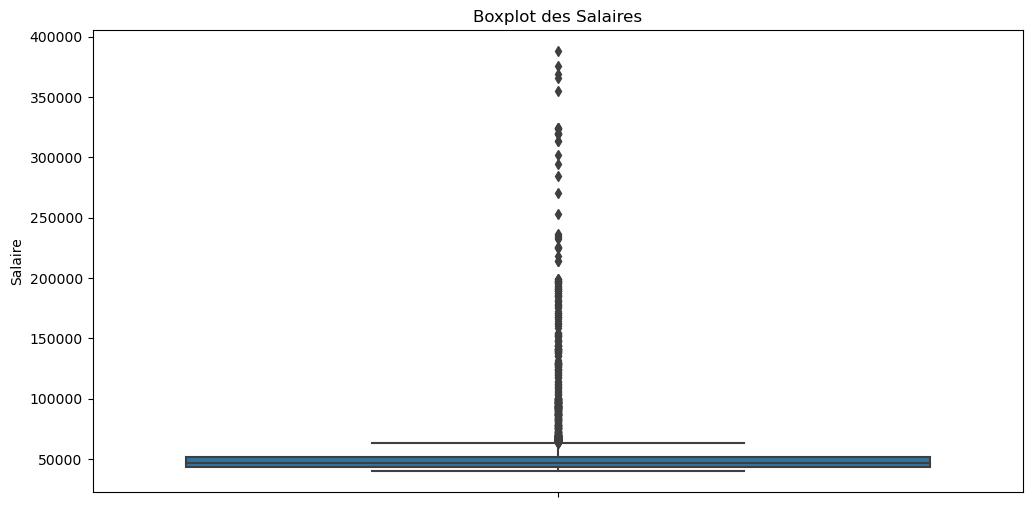

Salaires :
Salaire minimum : 40001
Salaire maximum : 388112
Salaire médian : 46781.0
Salaire moyen : 58136.67828723001


In [16]:
#Boxplot du salaire global
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, y='SALARY')
plt.title('Boxplot des Salaires')
plt.ylabel('Salaire')
plt.show()

# Affichage des résultats statistiques du salaire
print("Salaires :")
print(f"Salaire minimum : {data['SALARY'].min()}")
print(f"Salaire maximum : {data['SALARY'].max()}")
print(f"Salaire médian : {data['SALARY'].median()}")
print(f"Salaire moyen : {data['SALARY'].mean()}")

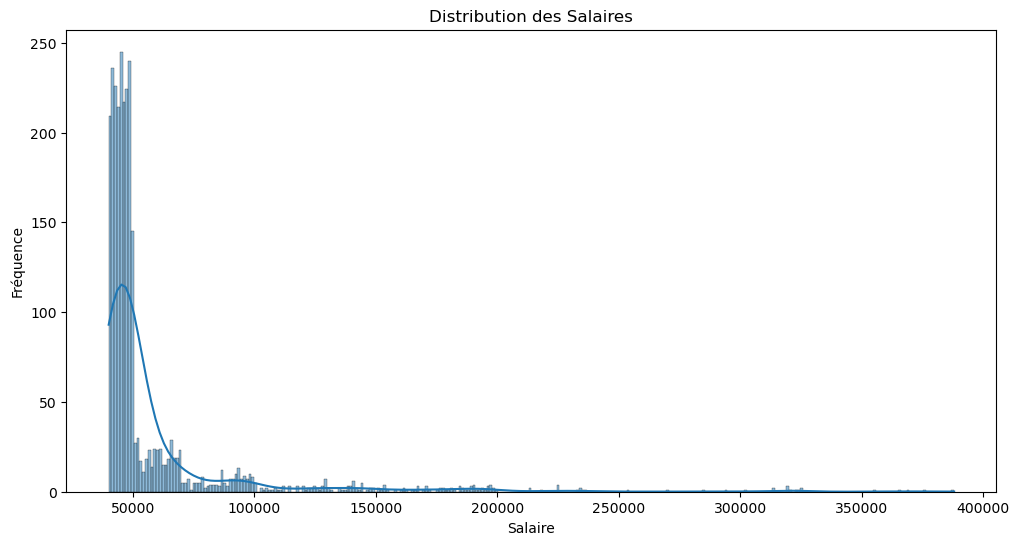

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Distribution des Salaires')
plt.xlabel('Salaire')
plt.ylabel('Fréquence')
plt.show()


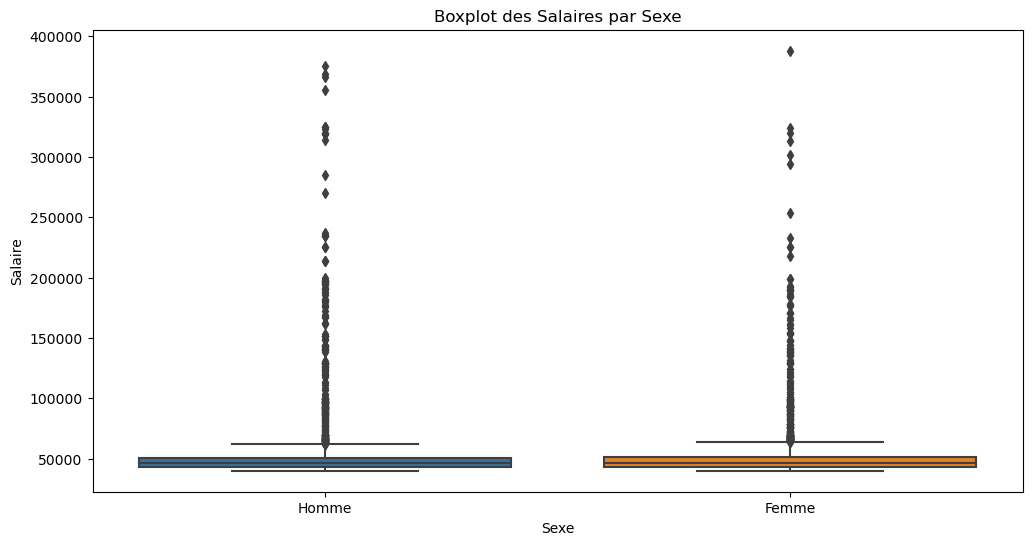

In [18]:


# Boxplot du salaire par sexe
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='SEX', y='SALARY')
plt.title('Boxplot des Salaires par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Salaire')
plt.xticks([0, 1], ['Homme', 'Femme'])
plt.show()


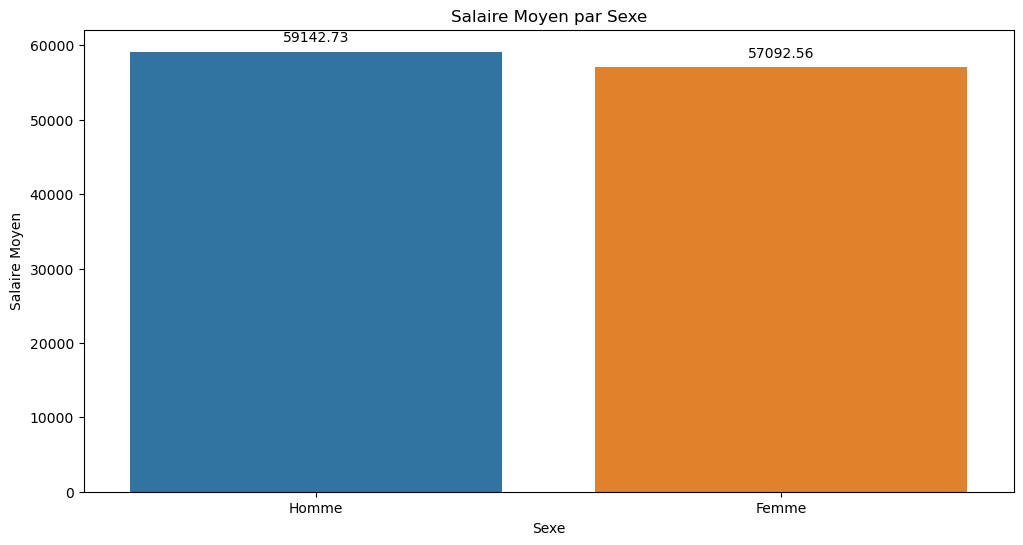

In [19]:
# Barplot du salaire moyen par sexe
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='SEX', y='SALARY', ci=None)
plt.title('Salaire Moyen par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Salaire Moyen')
plt.xticks([0, 1], ['Homme', 'Femme'])
# Ajouter les annotations des valeurs
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

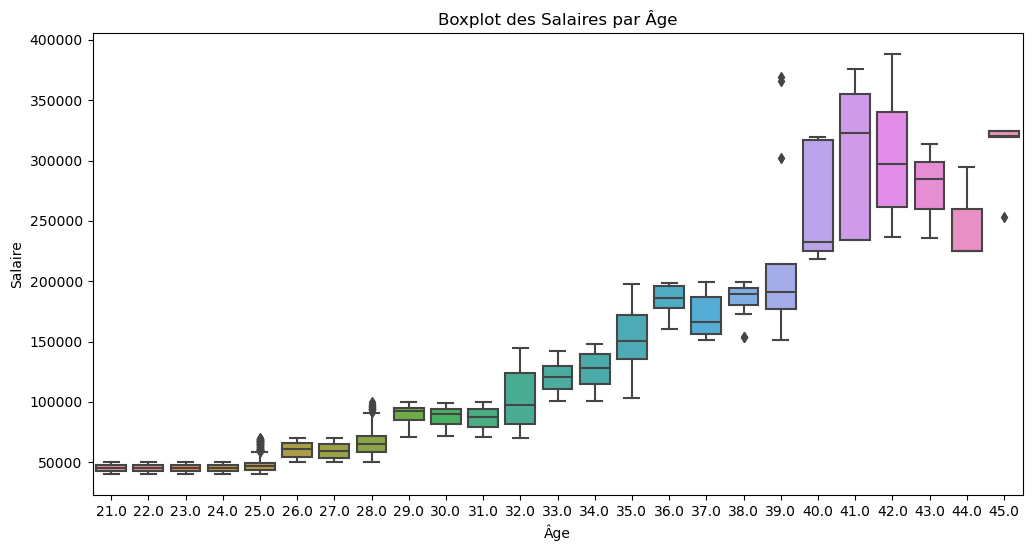

In [20]:
# Boxplot du salaire par âge
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='AGE', y='SALARY')
plt.title('Boxplot des Salaires par Âge')
plt.xlabel('Âge')
plt.ylabel('Salaire')
plt.show()

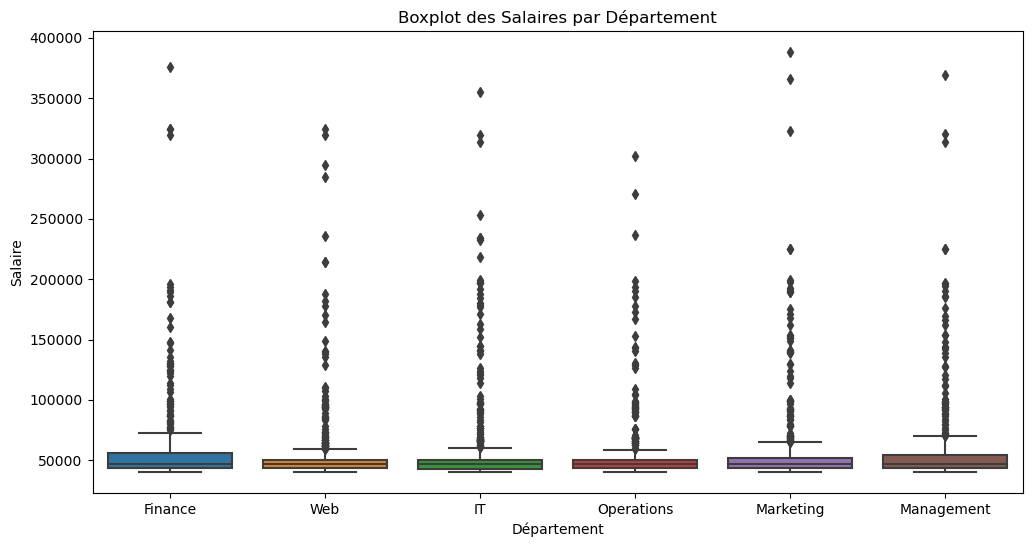

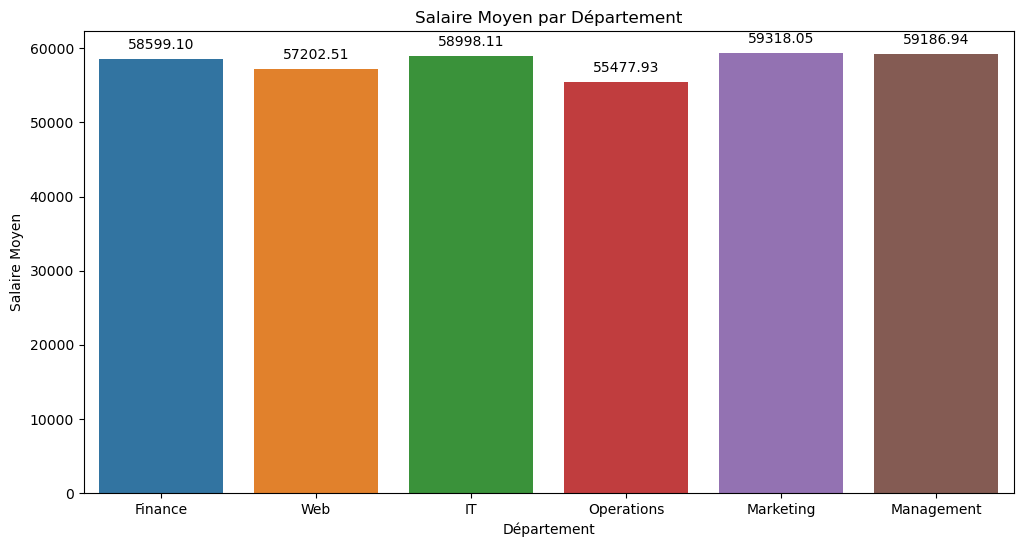

In [21]:
# Boxplot du salaire par département
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='UNIT', y='SALARY')
plt.title('Boxplot des Salaires par Département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.show()

# Barplot du salaire moyen par département
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='UNIT', y='SALARY', ci=None)
plt.title('Salaire Moyen par Département')
plt.xlabel('Département')
plt.ylabel('Salaire Moyen')
# Ajouter les annotations des valeurs
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()



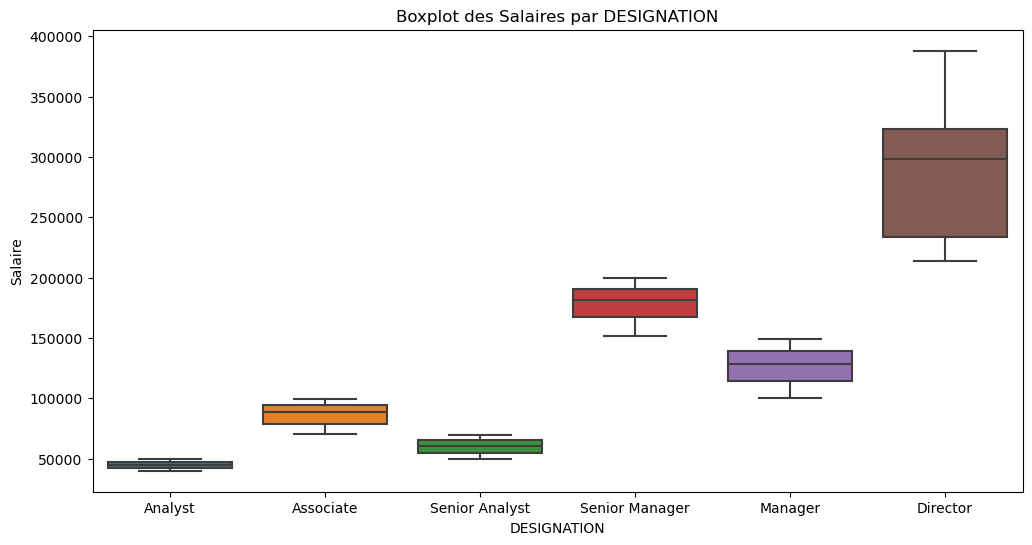

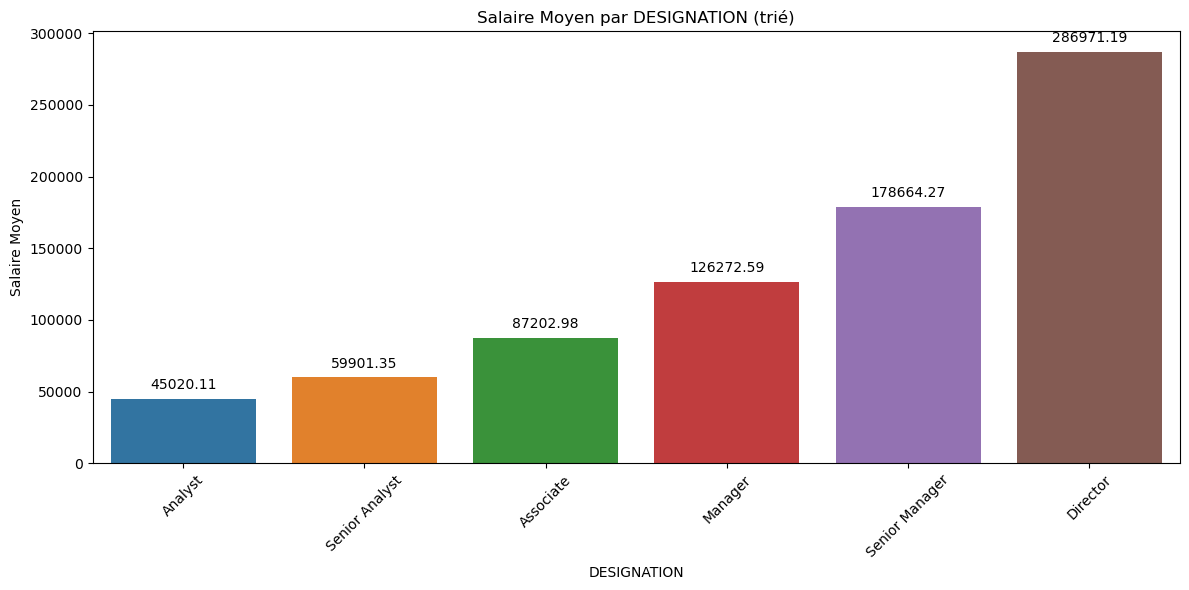

In [22]:
# Boxplot du salaire par Unit
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='DESIGNATION', y='SALARY')
plt.title('Boxplot des Salaires par DESIGNATION')
plt.xlabel('DESIGNATION')
plt.ylabel('Salaire')
plt.show()

# Barplot du salaire moyen par département
# Trier les données par salaire moyen par DESIGNATION de manière croissante
sorted_data = data.groupby('DESIGNATION')['SALARY'].mean().reset_index().sort_values(by='SALARY')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_data, x='DESIGNATION', y='SALARY', ci=None)
plt.title('Salaire Moyen par DESIGNATION (trié)')
plt.xlabel('DESIGNATION')
plt.ylabel('Salaire Moyen')

# Ajouter les annotations des valeurs
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

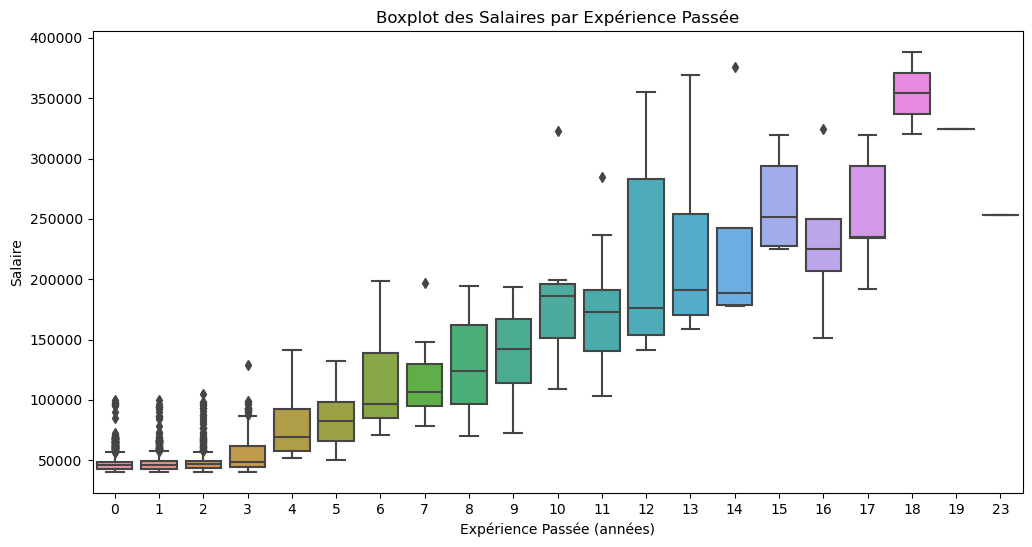

In [23]:
# Boxplot du salaire par expérience passée
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='PAST EXP', y='SALARY')
plt.title('Boxplot des Salaires par Expérience Passée')
plt.xlabel('Expérience Passée (années)')
plt.ylabel('Salaire')
plt.show()

Les données montrent une corrélation cohérente entre l'expérience professionnelle et le salaire : plus une personne a d'années d'expérience, plus son salaire est élevé. Parmi les différents métiers étudiés, les analystes ont le salaire le plus bas tandis que les postes de management affichent les rémunérations les plus élevées. En ce qui concerne les salaires par département, ils sont globalement uniformes.

# Répartition des hommes et des femmes dans l'entreprises

In [24]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

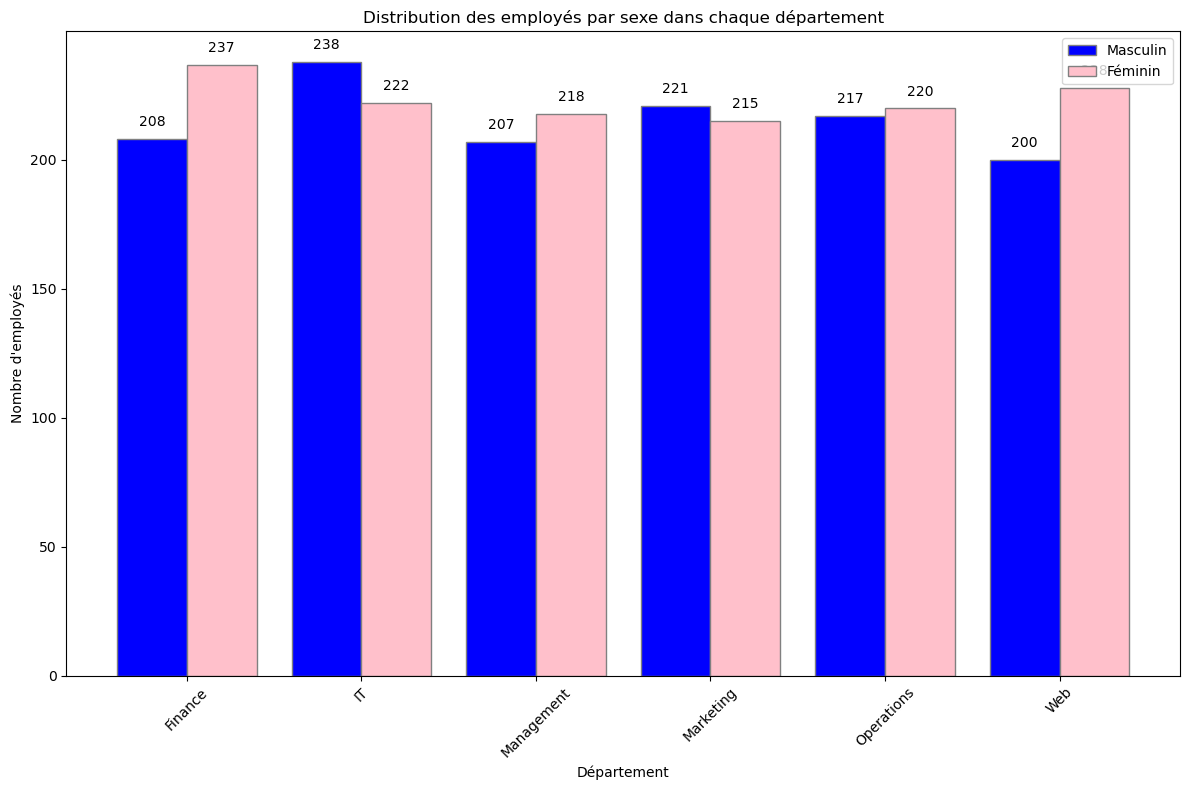

In [25]:


# Calculer le nombre d'employés par sexe et par département
gender_dept_counts = df.groupby(['UNIT', 'SEX']).size().unstack()

# Plot
plt.figure(figsize=(12, 8))

# Positions des barres
bar_width = 0.4
r1 = range(len(gender_dept_counts.index))
r2 = [x + bar_width for x in r1]

# Plot des barres pour les hommes et les femmes
plt.bar(r1, gender_dept_counts['M'], color='blue', width=bar_width, edgecolor='grey', label='Masculin')
plt.bar(r2, gender_dept_counts['F'], color='pink', width=bar_width, edgecolor='grey', label='Féminin')

plt.xlabel('Département')
plt.ylabel('Nombre d\'employés')
plt.title('Distribution des employés par sexe dans chaque département')
plt.xticks([r + bar_width / 2 for r in range(len(gender_dept_counts.index))], gender_dept_counts.index, rotation=45)
plt.legend()

# Ajouter les annotations des valeurs numériques au-dessus de chaque barre
for r1, value_m, value_f in zip(r1, gender_dept_counts['M'], gender_dept_counts['F']):
    plt.text(r1, value_m + 5, str(value_m), ha='center', color='black')
    plt.text(r2[r1], value_f + 5, str(value_f), ha='center', color='black')

plt.tight_layout()
plt.show()


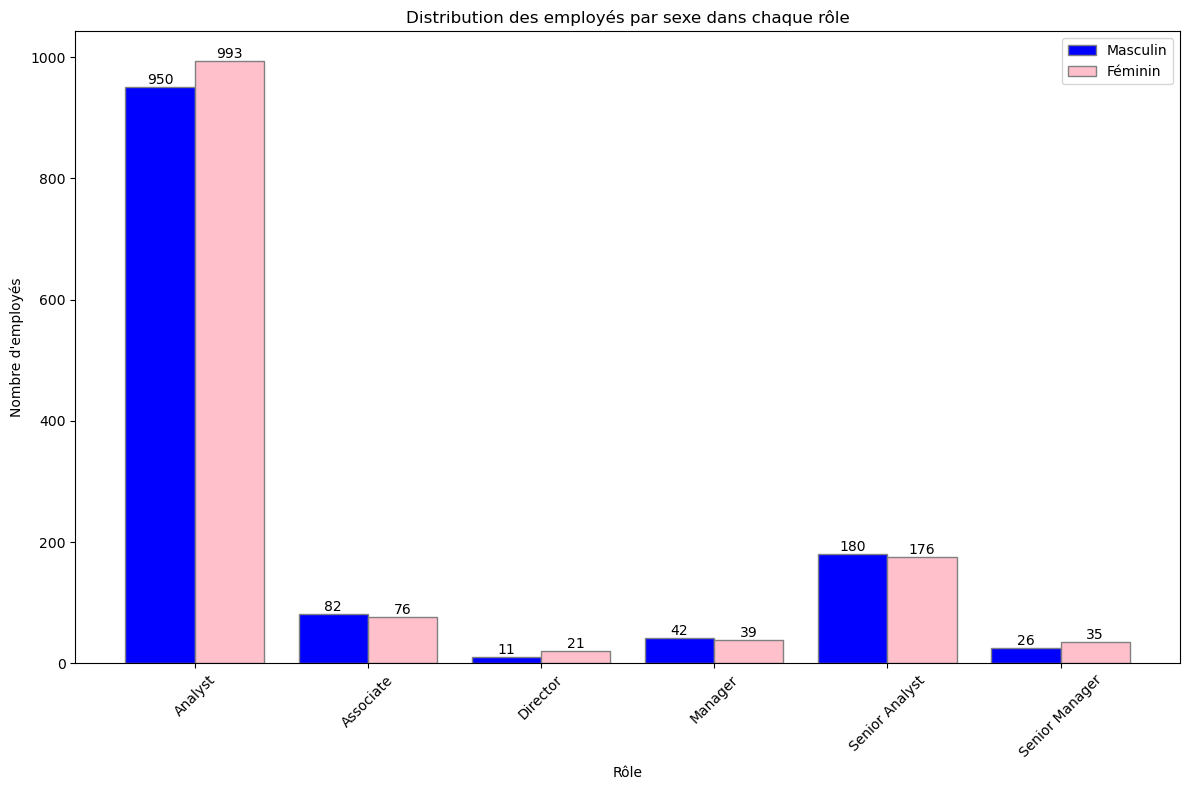

In [26]:
# Calculer le nombre d'employés par sexe et par rôle
gender_role_counts = df.groupby(['DESIGNATION', 'SEX']).size().unstack()

# Plot
plt.figure(figsize=(12, 8))

# Positions des barres
bar_width = 0.4
r1 = range(len(gender_role_counts.index))
r2 = [x + bar_width for x in r1]

# Plot des barres pour les hommes et les femmes
plt.bar(r1, gender_role_counts['M'], color='blue', width=bar_width, edgecolor='grey', label='Masculin')
plt.bar(r2, gender_role_counts['F'], color='pink', width=bar_width, edgecolor='grey', label='Féminin')

plt.xlabel('Rôle')
plt.ylabel('Nombre d\'employés')
plt.title('Distribution des employés par sexe dans chaque rôle')
plt.xticks([r + bar_width / 2 for r in range(len(gender_role_counts.index))], gender_role_counts.index, rotation=45)
plt.legend()

# Ajouter les annotations des valeurs numériques au-dessus de chaque barre
for r1, value_m, value_f in zip(r1, gender_role_counts['M'], gender_role_counts['F']):
    plt.text(r1, value_m + 5, str(value_m), ha='center', color='black')
    plt.text(r2[r1], value_f + 5, str(value_f), ha='center', color='black')

plt.tight_layout()
plt.show()


In [27]:
# Calculer le nombre total d'hommes et de femmes par fonction et département
gender_counts = df.groupby(['DESIGNATION', 'UNIT', 'SEX']).size().unstack(fill_value=0)
# Calculer le pourcentage de différence entre hommes et femmes
gender_counts['DIFF_PERCENTAGE'] = ((gender_counts['M'] - gender_counts['F']) / gender_counts[['M', 'F']].sum(axis=1)) * 100

# Affichage des pourcentages de différence et conclusion
print("\nPourcentage de différence entre hommes et femmes par fonction et département :")
for idx, row in gender_counts.iterrows():
    diff_percentage = row['DIFF_PERCENTAGE']
    designation = idx[0]
    unit = idx[1]
    print(f"Pourcentage de différence entre hommes et femmes pour {designation} dans le département {unit}: {diff_percentage:.2f}%")

# Conclusion
min_diff = gender_counts['DIFF_PERCENTAGE'].idxmin()
max_diff = gender_counts['DIFF_PERCENTAGE'].idxmax()

print("\nConclusion :")
print(f"La différence de pourcentage est la plus faible pour {min_diff[0]} dans le département {min_diff[1]}.")
print(f"La différence de pourcentage est la plus forte pour {max_diff[0]} dans le département {max_diff[1]}.")


Pourcentage de différence entre hommes et femmes par fonction et département :
Pourcentage de différence entre hommes et femmes pour Analyst dans le département Finance: -8.18%
Pourcentage de différence entre hommes et femmes pour Analyst dans le département IT: 4.00%
Pourcentage de différence entre hommes et femmes pour Analyst dans le département Management: -5.23%
Pourcentage de différence entre hommes et femmes pour Analyst dans le département Marketing: 0.96%
Pourcentage de différence entre hommes et femmes pour Analyst dans le département Operations: 1.79%
Pourcentage de différence entre hommes et femmes pour Analyst dans le département Web: -7.45%
Pourcentage de différence entre hommes et femmes pour Associate dans le département Finance: -7.69%
Pourcentage de différence entre hommes et femmes pour Associate dans le département IT: 16.67%
Pourcentage de différence entre hommes et femmes pour Associate dans le département Management: 21.43%
Pourcentage de différence entre hommes

In [28]:
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [29]:
# Convertir la colonne DOJ en format datetime si nécessaire
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m-%d-%Y')

# Créer la nouvelle colonne DOJ1 avec seulement l'année
df['DOJ1'] = df['DOJ'].dt.year

df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculer la différence en mois
df['Months in Company'] = (df['CURRENT DATE'] - df['DOJ']) / pd.Timedelta(days=1) / 30
# Convertir en nombre à virgule avec 2 décimales
df['Months in Company'] = df['Months in Company'].round(2)
selected_columns = ['SEX', 'Months in Company', 'DESIGNATION', 'AGE', 'SALARY', 'UNIT', 'RATINGS','PAST EXP']
df_selected = df[selected_columns].copy()
label_encoders = {}
for column in ['SEX', 'DESIGNATION', 'UNIT']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le.classes_
# Afficher les classes pour chaque colonne encodée
for column, classes in label_encoders.items():
    print(f"Encodage pour la colonne {column}:")
    for idx, class_ in enumerate(classes):
        print(f"  {class_} -> {idx}")

Encodage pour la colonne SEX:
  F -> 0
  M -> 1
Encodage pour la colonne DESIGNATION:
  Analyst -> 0
  Associate -> 1
  Director -> 2
  Manager -> 3
  Senior Analyst -> 4
  Senior Manager -> 5
Encodage pour la colonne UNIT:
  Finance -> 0
  IT -> 1
  Management -> 2
  Marketing -> 3
  Operations -> 4
  Web -> 5


In [30]:
df_selected.head()

,SEX,Months in Company,DESIGNATION,AGE,SALARY,UNIT,RATINGS,PAST EXP
0,0,19.97,0,21.0,44570,0,2.0,0
2,0,17.60,0,21.0,40955,0,3.0,0
3,0,33.63,0,22.0,45550,1,3.0,0
6,1,28.57,0,22.0,40339,3,5.0,0
8,0,18.57,4,28.0,63478,4,3.0,1


In [31]:
df_selected['PAST EXP'].unique()

array([ 0,  1,  2,  3, 13,  5,  9,  6, 10,  4, 12, 18, 11,  8, 17,  7, 14,
       19, 23, 15, 16], dtype=int64)

# Analyse Prédictive :

Prédire le salaire d'un employé en fonction de son expérience, de son intitulé de poste, de son département, de ses évaluations de performance, et d'autres variables pertinentes.

 'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)

In [32]:
# Séparer les caractéristiques (features) et la variable cible (target)
X = df_selected.drop('SALARY', axis=1)
y = df_selected['SALARY']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(2104, 7)

In [34]:
X_test.shape

(527, 7)

In [39]:
# Initialisation des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

# Entraîner et évaluer les modèles
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{name} RMSE: {rmse} mse {mse} r2 {r2}')
    

Linear Regression RMSE: 15276.1889539237 mse 233361948.95598045 r2 0.8135240488754873
Random Forest RMSE: 7851.312872896071 mse 61643113.82810355 r2 0.950741934009385
Gradient Boosting RMSE: 7735.068740047489 mse 59831288.41325985 r2 0.9521897358854667


In [40]:

# Définir les paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le modèle
rf = GradientBoostingRegressor(random_state=42)
# Configurer la recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Exécuter la recherche sur grille
grid_search.fit(X_train, y_train)
# Afficher les meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [41]:
# Modèle avec les meilleurs paramètres trouvés
best_model = grid_search.best_estimator_
# Afficher l'importance des features
feature_importances = best_model.feature_importances_
features = X.columns
for feature, importance in zip(features, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: SEX, Importance: 0.0008806204592550748
Feature: Months in Company, Importance: 0.013388463540436216
Feature: DESIGNATION, Importance: 0.16567858421533505
Feature: AGE, Importance: 0.7913325497828766
Feature: UNIT, Importance: 0.017994096646076117
Feature: RATINGS, Importance: 0.007055691812136363
Feature: PAST EXP, Importance: 0.0036699935438845466


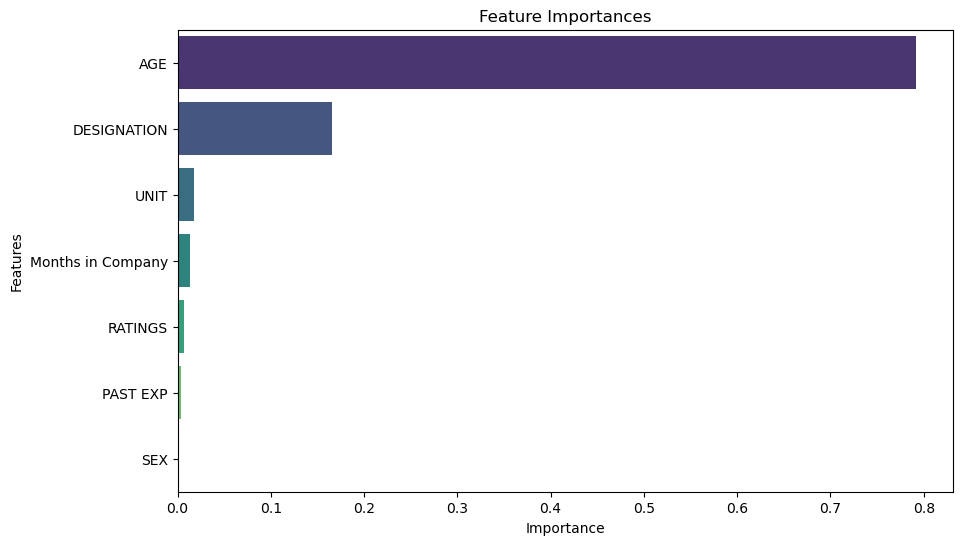

In [42]:
# Trier les importances des caractéristiques de manière décroissante
sorted_idx = feature_importances.argsort()[::-1]
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]
# Créer le graphique en barres transposées
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.title('Feature Importances: GradientBoostingRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [48]:
# Mettre à jour les données sans la colonne SEX
X = df_selected.drop(['SALARY', 'SEX'], axis=1)
y = df_selected['SALARY']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les paramètres pour la recherche sur grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le modèle
rf = GradientBoostingRegressor(random_state=42)

# Configurer la recherche sur grille
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Exécuter la recherche sur grille
grid_search.fit(X_train, y_train)

# Modèle avec les meilleurs paramètres trouvés
best_model = grid_search.best_estimator_


# Faire des prédictions et évaluer la performance
predictions = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mean_salary = np.mean(y_test)
mae_percentage = (mae / mean_salary) * 100
print(f'RMSE: {rmse}, MAE: {mae}, MSE: {mse}, R2: {r2}, MAE%: {mae_percentage:.2f}%')

RMSE: 8675.578937973702, MAE: 4519.613035529996, MSE: 75265669.90901291, R2: 0.939856358561891, MAE%: 7.83%


In [49]:
# import numpy as np
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Mettre à jour les données sans la colonne SEX
# X = df_selected.drop(['SALARY', 'SEX'], axis=1)
# y = df_selected['SALARY']

# # Séparer les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Définir les paramètres pour la recherche sur grille
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialiser le modèle
# rf = GradientBoostingRegressor(random_state=42)

# # Configurer la recherche sur grille
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Exécuter la recherche sur grille
# grid_search.fit(X_train, y_train)

# # Modèle avec les meilleurs paramètres trouvés
# best_model = grid_search.best_estimator_

# # Faire des prédictions et évaluer la performance
# predictions = best_model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, predictions))
# mae = mean_absolute_error(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# r2 = r2_score(y_test, predictions)
# print(f'RMSE: {rmse}, MAE: {mae}, MSE: {mse}, R2: {r2}')

def is_valid_age(age):
    return 18 <= age <= 64

def is_valid_exp_and_months(age, past_exp, months_in_company):
    max_exp = (age - 18) * 12  # Expérience maximale en mois depuis l'âge de 18 ans
    return past_exp <= max_exp and months_in_company <= max_exp

def is_valid_designation(designation):
    return 0 <= designation <= 5

def is_valid_unit(unit):
    return 0 <= unit <= 5

def is_valid_ratings(ratings):
    return 1 <= ratings <= 5

def get_valid_input(prompt, validation_fn, error_message):
    while True:
        value = float(input(prompt))
        if validation_fn(value):
            return value
        else:
            print(error_message)

def confirm_or_correct(prompt, error_message, validation_fn):
    while True:
        value = float(input(prompt))
        if validation_fn(value):
            return value
        else:
            print(error_message)
            confirmation = input("Êtes-vous sûr ? (oui/non): ").strip().lower()
            if confirmation == 'oui':
                return value

def predict_salary(model):
    print("Encodage pour la colonne DESIGNATION:")
    print("  Analyst -> 0")
    print("  Associate -> 1")
    print("  Director -> 2")
    print("  Manager -> 3")
    print("  Senior Analyst -> 4")
    print("  Senior Manager -> 5")
    designation = confirm_or_correct(
        "Entrez la désignation: ",
        "La désignation doit être un nombre entre 0 et 5.",
        is_valid_designation
    )
    
    age = confirm_or_correct(
        "Entrez votre âge: ",
        "L'âge doit être compris entre 18 et 64 ans.",
        is_valid_age
    )
    
    print("Encodage pour la colonne UNIT:")
    print("  Finance -> 0")
    print("  IT -> 1")
    print("  Management -> 2")
    print("  Marketing -> 3")
    print("  Operations -> 4")
    print("  Web -> 5")
    unit = confirm_or_correct(
        "Entrez l'unité: ",
        "L'unité doit être un nombre entre 0 et 5.",
        is_valid_unit
    )
    
    ratings = confirm_or_correct(
        "Entrez la note de performance (entre 1 et 5): ",
        "La note de performance doit être comprise entre 1 et 5.",
        is_valid_ratings
    )
    
    past_exp = confirm_or_correct(
        "Entrez le nombre d'années d'expérience passée: ",
        f"L'expérience ne peut pas dépasser {age - 18} années.",
        lambda exp: exp <= age - 18
    )
    
    months_in_company = confirm_or_correct(
        "Entrez le nombre de mois dans la boîte: ",
        f"Les mois dans la boîte ne peuvent pas dépasser {(age - 18) * 12 - past_exp * 12} mois.",
        lambda months: is_valid_exp_and_months(age, past_exp, months)
    )
    
    # Créer un array avec les informations fournies dans le bon ordre
    user_data = np.array([[months_in_company, designation, age, unit, ratings, past_exp]])
    
    # Prédire le salaire
    predicted_salary = model.predict(user_data)[0]
    
    # Calculer la fourchette de prédiction à ±10 %
    lower_bound = predicted_salary * 0.9
    upper_bound = predicted_salary * 1.1
    
    # Afficher le résultat
    print(f"Le salaire prédit est: {predicted_salary:.2f}")
    print(f"La fourchette de salaire prédite (±10%) est: {lower_bound:.2f} - {upper_bound:.2f}")

# Supposons que 'best_model' soit votre modèle entraîné
# Appeler la fonction pour prédire le salaire
predict_salary(best_model)


Encodage pour la colonne DESIGNATION:
  Analyst -> 0
  Associate -> 1
  Director -> 2
  Manager -> 3
  Senior Analyst -> 4
  Senior Manager -> 5
Entrez la désignation: 1
Entrez votre âge: 25
Encodage pour la colonne UNIT:
  Finance -> 0
  IT -> 1
  Management -> 2
  Marketing -> 3
  Operations -> 4
  Web -> 5
Entrez l'unité: 2
Entrez la note de performance (entre 1 et 5): 6
La note de performance doit être comprise entre 1 et 5.
Êtes-vous sûr ? (oui/non): non
Entrez la note de performance (entre 1 et 5): 4
Entrez le nombre d'années d'expérience passée: 2
Entrez le nombre de mois dans la boîte: 25
Le salaire prédit est: 80454.97
La fourchette de salaire prédite (±10%) est: 72409.47 - 88500.47
